# Run the whole deltas algorithm

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas
import deltas_jonny

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data and classifier

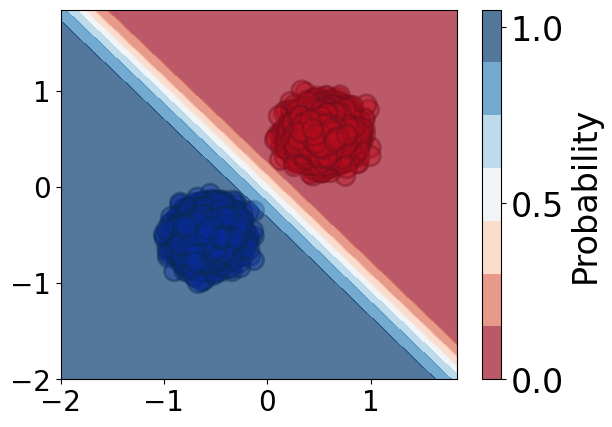

In [7]:
N1 = 10000
N2 = 10000
data_clf = pipeline.get_data_and_classifier(N1=N1, N2=N2)

data = data_clf['data']
clf = data_clf['clf']
m1 = data_clf['mean1']
m2 = data_clf['mean2']

## Get projection and data we need (R, D, M etc.)

R1 empirical: 0.5037518398845575
R2 empirical: 0.5166753245511412


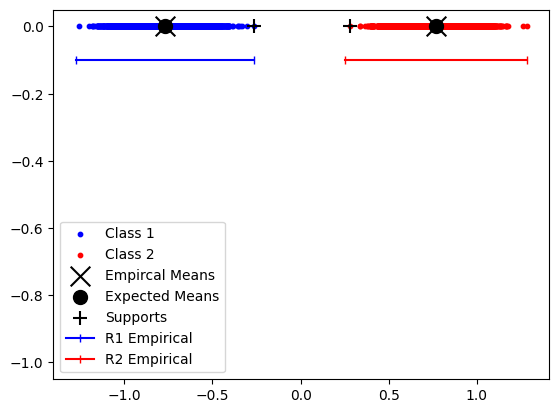

In [8]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'])

## set up extra parameters

In [9]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
data_info['N1'] = N1
data_info['N2'] = N2
pipeline.print_params(data_info)

Parameters
        R:  1.2829991345763276
        N1: 10000
        N2: 10000
        R1: 0.5037518398845575
        R2: 0.5166753245511412
        M:  0.5497810239871455
        D:  1.537316835102374
        C1: 1
        C2: 1


## Optimiser

delta1 : 0.5349128459512614 
delta2: 4.9177415356293414e-129
constraint: [0.23819806] should equal 0
R1_est : 0.5837754855962107 
R2_est: 0.5966989702627944


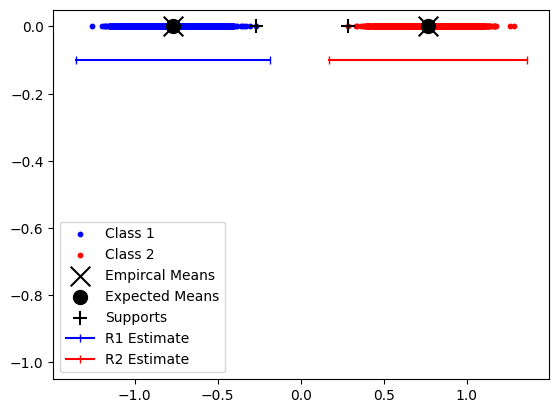

In [10]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
loss_func = deltas.loss_one_delta   # loss_func only - won't use gradient during optimisation

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas_jonny.delta2_given_delta1_jonny # need to also change eq. 10 based on this in deltas.py
 
delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, delta1_from_delta2_func)